# Histogram

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect("../../data/checking-logs.sqlite")

In [7]:
df = pd.io.sql.read_sql("SELECT timestamp FROM checker WHERE uid LIKE 'user_%'", conn, parse_dates=["timestamp"])

In [9]:
df["hour"] = df["timestamp"].dt.hour
df["is_weekend"] = df["timestamp"].dt.day_name().isin(["Saturday", "Sunday"])

In [12]:
commit_count = df.groupby(["is_weekend", "hour"]).size().reset_index(name = "commit_count")

In [19]:
final_df = commit_count.pivot(index="hour", columns="is_weekend", values="commit_count")
final_df = final_df.reindex(pd.Series(range(0, 24)))
final_df = final_df.fillna(0)
final_df = final_df.rename(axis=1, mapper={False:"working days", True:"weekend"})

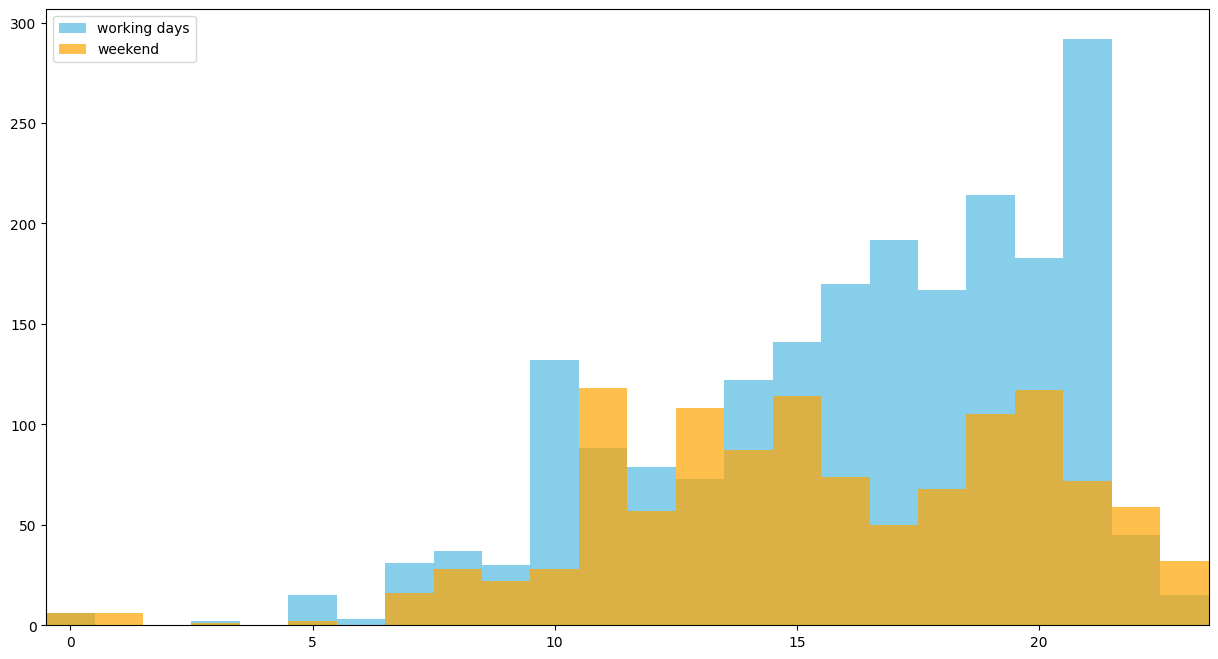

In [69]:
plt.figure(figsize=(15, 8))
plt.bar(x = final_df.index,
        height=final_df["working days"],
        width=1,
        color = "skyblue")
plt.bar(x = final_df.index,
        height=final_df["weekend"],
        width=1,
        color = "orange",
        alpha = 0.7)
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(["working days", "weekend"]);


In [70]:
conn.close()